# Convolutional Neural Network (CNN) Tutorial with MNIST

This tutorial walks through the process of building a Convolutional Neural Network (CNN) with TensorFlow to classify handwritten digits from the MNIST dataset. CNNs are a class of deep neural networks that are particularly good at picking up patterns in spatial data, such as images.


## Step 1: Load and Preprocess the Dataset

### Load the Dataset

First, we load the MNIST dataset. MNIST is a classic dataset in machine learning, consisting of 28x28 pixel images of handwritten digits (0 through 9).


In [46]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt

In [47]:
import numpy as np

# Load the dataset from your local directory
with np.load('./datasets/mnist.npz') as f:
    X_train, y_train = f['x_train'], f['y_train']
    X_test, y_test = f['x_test'], f['y_test']

### Preprocessing

The images need to be reshaped for the CNN and normalized. Normalization helps the neural network learn more effectively. The target variable is also one-hot encoded to represent class membership in a binary format.

In [48]:
# Reshape for a convolutional neural network (CNN)
X_train = X_train.reshape((-1, 28, 28, 1)) 
X_test = X_test.reshape((-1, 28, 28, 1))

In [49]:
# Normalize (important for neural networks)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [50]:
# One-hot encode the target variable
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Step 2: Create Model Architecture

We use TensorFlow's Keras API to build a sequential model. The model starts with a convolutional layer (Conv2D), followed by a max-pooling layer (MaxPooling2D), a flattening layer (Flatten), and two dense layers (Dense), with the final layer using softmax activation for classification.

In [51]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Step 3: Compile the Model

The model is compiled with the Adam optimizer, categorical crossentropy loss function (since it's a multi-class classification problem), and accuracy as the metric for evaluation.

In [52]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Step 4: Train and Evaluate the Model

The model is trained on the training set with a validation split to monitor its performance on unseen data. After training, the model's accuracy is evaluated on the test set.

In [53]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Epoch 1/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1651 - accuracy: 0.9505 - val_loss: 0.0632 - val_accuracy: 0.9832
Epoch 2/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0583 - val_accuracy: 0.9830
Epoch 3/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0358 - accuracy: 0.9887 - val_loss: 0.0502 - val_accuracy: 0.9863
Epoch 4/5
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0239 - accuracy: 0.9920 - val_loss: 0.0565 - val_accuracy: 0.9863
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9858
Test Accuracy: 0.98580002784729


### Visualization of Training Progress

Plotting the training and validation accuracy and loss over epochs helps identify if the model is learning effectively and if it's overfitting or underfitting.

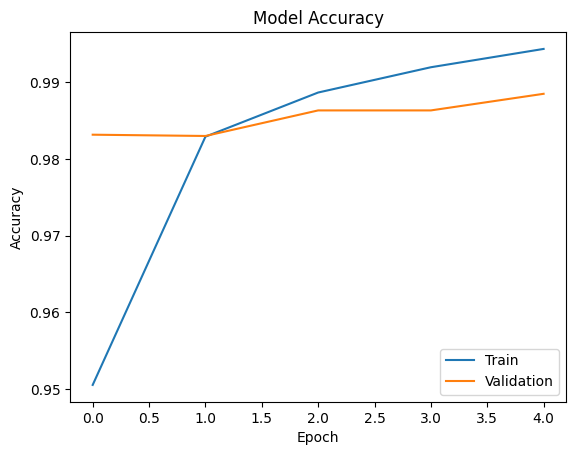

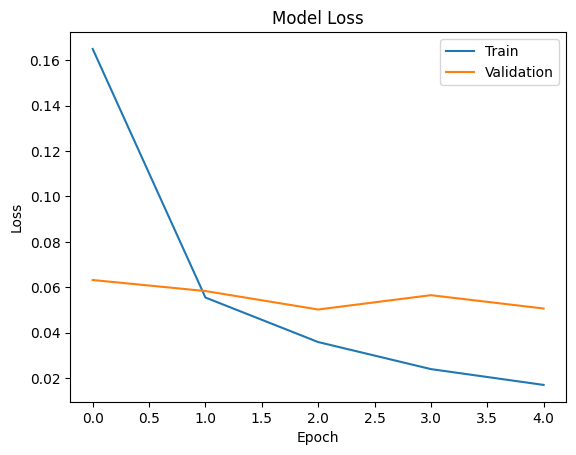

In [54]:
# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

# Loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Understanding Neural Networks

* Artificial Neurons: The basic computational units of a neural network, inspired by biological neurons, which receive inputs, process them, and generate outputs.
* Layers: Organized groups of neurons. In a CNN, these include convolutional layers, pooling layers, and dense (fully connected) layers.
* Convolutional Layers (Conv2D): Specialized for picking up patterns in images, such as edges, textures, or complex shapes.
* MaxPooling2D: Reduces the spatial dimensions (width, height) of the input volume for the next convolutional layer. It helps reduce computation and overfitting by extracting only the

313/313 [==============================] - 0s 1ms/step


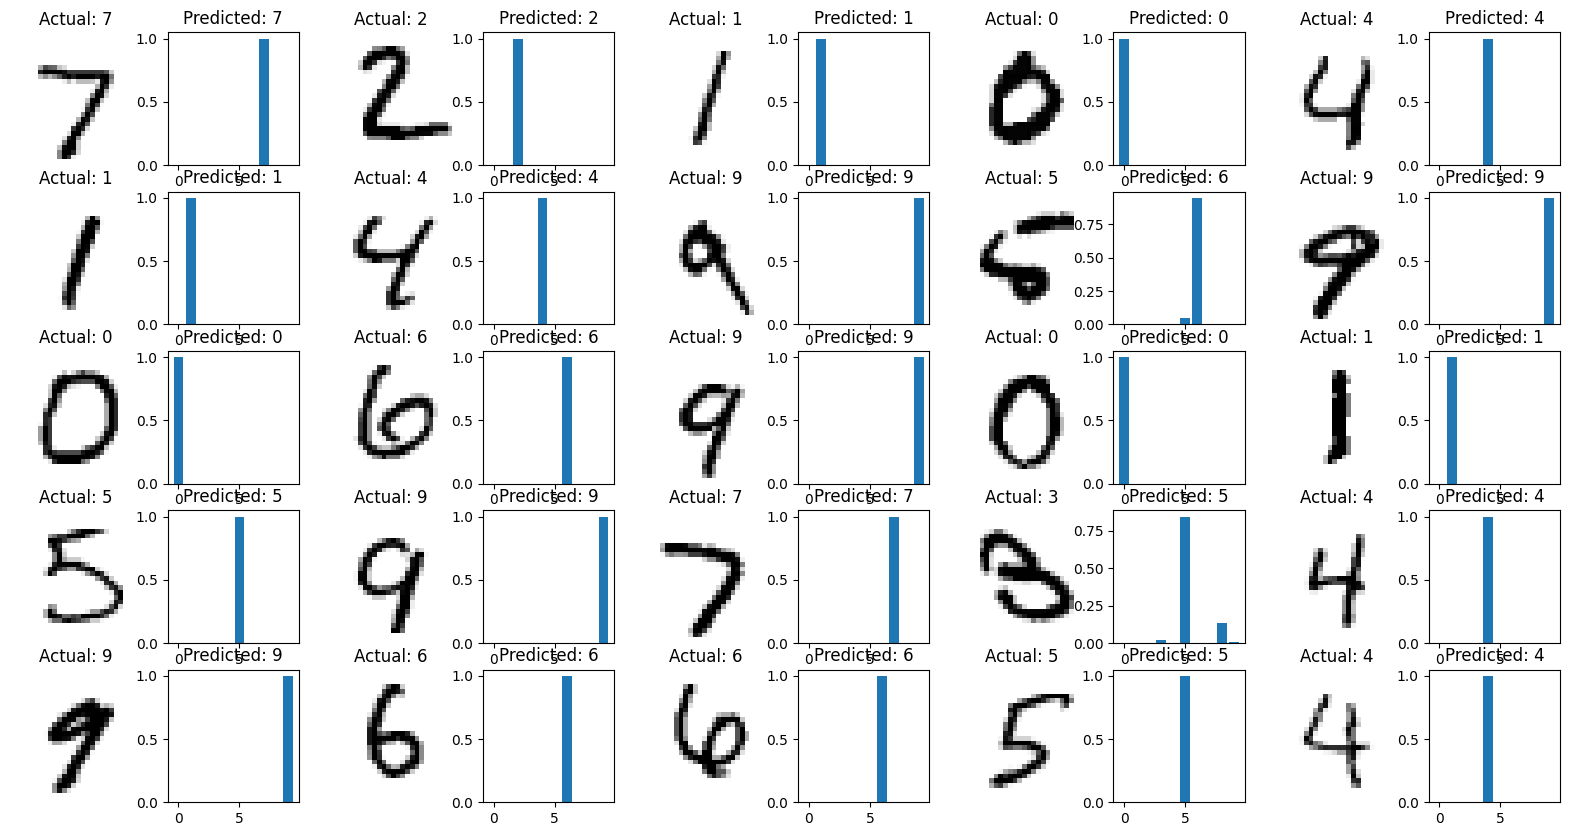

In [55]:
# Generate predictions
predictions = model.predict(X_test)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(predictions, axis=1) 
# Convert validation observations to one hot vectors
y_true = np.argmax(y_test, axis=1) 

# Display a grid of images with their predictions
num_rows = 5
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plt.imshow(X_test[i].reshape(28,28), cmap=plt.cm.binary)
  plt.title('Actual: {}'.format(y_true[i]))
  plt.axis('off')
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plt.bar(range(10), predictions[i])
  plt.title('Predicted: {}'.format(y_pred_classes[i]))
plt.show()


In this visualization:

* The left column within each pair shows the actual handwritten digit image.
* The right column shows a bar chart of the model's softmax output, which represents the model's confidence scores for each class.